In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from utils.CaImageCSV import CaImageCSV
import utils.sulfur.constant as const

In [2]:
animal_name = 'ID181106CreC'
file_path = './resources/%s_Longitudinal_Traces.csv' % animal_name
csv = CaImageCSV(file_path)

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [3]:
preES_indexes = np.where(csv.data_frame.index.get_loc_level(key='A1preES', level=0, drop_level=False)[0])[0]
postES_indexes = np.where(csv.data_frame.index.get_loc_level(key='A1postES', level=0, drop_level=False)[0])[0]

A2_context_matrix = csv.data_frame.iloc[preES_indexes[0]:(postES_indexes[-1] + 1), :]
optimized_A2_context_matrix = csv.optimize_std(A2_context_matrix.astype(float))
optimized_A2_context_matrix.dropna(how='all', axis=1, inplace=True)
optimized_A2_context_matrix.fillna(0.0, inplace=True, axis=1)

In [4]:
cell_correlation_per_time = []
for second in range(len(optimized_A2_context_matrix) // 10):
    sliding_window_data = optimized_A2_context_matrix.iloc[second:second+10, :]
    cell_correlation_per_time.append(sliding_window_data.corr())

cell_correlation_per_time

[          C000      C002      C003      C005      C006      C007      C008  \
 C000  1.000000  0.980958  0.900214  0.999996 -0.913388  0.999837  0.999357   
 C002  0.980958  1.000000  0.841154  0.980581 -0.843783  0.978488  0.984927   
 C003  0.900214  0.841154  1.000000  0.900678 -0.885599  0.902919  0.893619   
 C005  0.999996  0.980581  0.900678  1.000000 -0.914506  0.999885  0.999248   
 C006 -0.913388 -0.843783 -0.885599 -0.914506  1.000000 -0.920183 -0.898953   
 ...        ...       ...       ...       ...       ...       ...       ...   
 C293  0.666515  0.680203  0.601489  0.664937 -0.385438  0.656664  0.685525   
 C294  0.480195  0.406159  0.480905  0.482112 -0.758570  0.491976  0.456116   
 C295  0.999961  0.979785  0.901593  0.999982 -0.916763  0.999958  0.999000   
 C296 -0.763910 -0.723695 -0.856948 -0.764491  0.728832 -0.767419 -0.756293   
 C297  0.800495  0.834182  0.690954  0.799162 -0.539884  0.792139  0.816411   
 
           C010      C011      C012  ...      C287

In [5]:
seconds = (len(optimized_A2_context_matrix) // 10)
df = pd.DataFrame(columns=list(range(seconds)), index=list(range(seconds)))
for i in range(seconds):
    print('seconds: %d' % i)
    i_time_data = cell_correlation_per_time[i]
    for j in range(seconds):
        j_time_data = cell_correlation_per_time[j]
        
        if df.at[j, i] is not np.nan:
            df.at[i, j] = df.at[j, i]
            continue
        
        cell_size = len(i_time_data)
        product_value = i_time_data * j_time_data
        corr_sum = (product_value - (product_value * np.eye(len(product_value)))).sum().sum()
        df.at[i, j] = corr_sum / (cell_size * (cell_size - 1))
df

seconds: 0
seconds: 1
seconds: 2
seconds: 3
seconds: 4
seconds: 5
seconds: 6
seconds: 7
seconds: 8
seconds: 9
seconds: 10
seconds: 11
seconds: 12
seconds: 13
seconds: 14
seconds: 15
seconds: 16
seconds: 17
seconds: 18
seconds: 19
seconds: 20
seconds: 21
seconds: 22
seconds: 23
seconds: 24
seconds: 25
seconds: 26
seconds: 27
seconds: 28
seconds: 29
seconds: 30
seconds: 31
seconds: 32
seconds: 33
seconds: 34
seconds: 35
seconds: 36
seconds: 37
seconds: 38
seconds: 39
seconds: 40
seconds: 41
seconds: 42
seconds: 43
seconds: 44
seconds: 45
seconds: 46
seconds: 47
seconds: 48
seconds: 49
seconds: 50
seconds: 51
seconds: 52
seconds: 53
seconds: 54
seconds: 55
seconds: 56
seconds: 57
seconds: 58
seconds: 59
seconds: 60
seconds: 61
seconds: 62
seconds: 63
seconds: 64
seconds: 65
seconds: 66
seconds: 67
seconds: 68
seconds: 69
seconds: 70
seconds: 71
seconds: 72
seconds: 73
seconds: 74
seconds: 75
seconds: 76
seconds: 77
seconds: 78
seconds: 79
seconds: 80
seconds: 81
seconds: 82
seconds: 83
se

0         1         2         3         4         5         6    \
0    0.534721  0.500952  0.453283  0.392094  0.325526  0.259434  0.201452   
1    0.500952  0.538075  0.520649  0.469639  0.403717  0.331041  0.260411   
2    0.453283  0.520649  0.553003  0.528152  0.474693  0.402391  0.325722   
3    0.392094  0.469639  0.528152  0.543943  0.518482  0.458383  0.384773   
4    0.325526  0.403717  0.474693  0.518482   0.54069  0.505706  0.443537   
..        ...       ...       ...       ...       ...       ...       ...   
514  0.003637  0.000145 -0.000858 -0.000718  0.001049  0.003271  0.005796   
515  0.004906  0.000566 -0.000549 -0.000425  0.001809  0.004195  0.006363   
516  0.007987  0.002568  0.001092   0.00104  0.003005  0.004322  0.007014   
517  0.011679  0.005447   0.00342  0.003227  0.004769  0.005718  0.008726   
518  0.013077  0.006782  0.004759  0.004687  0.006278  0.007471  0.010261   

          7         8         9    ...       509       510       511  \
0    0.155245  0.118567  0.102292  ...  0.003574  0.002806  0.005421   
1    0.202787  0.153086  0.125542  ...  0.003158  0.002241  0.003449   
2    0.258598  0.198106  0.159042  ...  0.005321  0.003704  0.003492   
3    0.314865  0.247403  0.200567  ...  0.007461  0.005109  0.003796   
4    0.375585  0.304914  0.251029  ...  0.008965  0.006416  0.004984   
..        ...       ...       ...  ...       ...       ...       ...   
514  0.006541  0.007232  0.007384  ...  0.192826  0.265115  0.331942   
515  0.007242  0.008826  0.009455  ...  0.136822  0.196886  0.256875   
516  0.008616  0.011155  0.012315  ...  0.097454  0.140386   0.18664   
517  0.011048  0.015025  0.017355  ...  0.072846    0.0987  0.129333   
518  0.013027  0.017844  0.021821  ...  0.061241  0.075768  0.095651   

          512       513       514       515       516       517       518  
0    0.006686  0.006054  0.003637  0.004906  0.007987  0.011679  0.013077  
1    0.003834  0.002162  0.000145  0.000566  0.002568  0.005447  0.006782  
2    0.003036  0.000745 -0.000858 -0.000549  0.001092   0.00342  0.004759  
3    0.002738  0.000237 -0.000718 -0.000425   0.00104  0.003227  0.004687  
4    0.003821  0.001308  0.001049  0.001809  0.003005  0.004769  0.006278  
..        ...       ...       ...       ...       ...       ...       ...  
514  0.407627  0.448382  0.465116  0.437128  0.372022  0.293468  0.230561  
515   0.33069  0.383249  0.437128  0.465831  0.430456  0.358212  0.291163  
516  0.247478  0.301153  0.372022  0.430456  0.466672  0.428476  0.368562  
517  0.175353  0.221051  0.293468  0.358212  0.428476  0.462277  0.434757  
518  0.128018  0.163495  0.230561  0.291163  0.368562  0.434757   0.46925  

[519 rows x 519 columns]

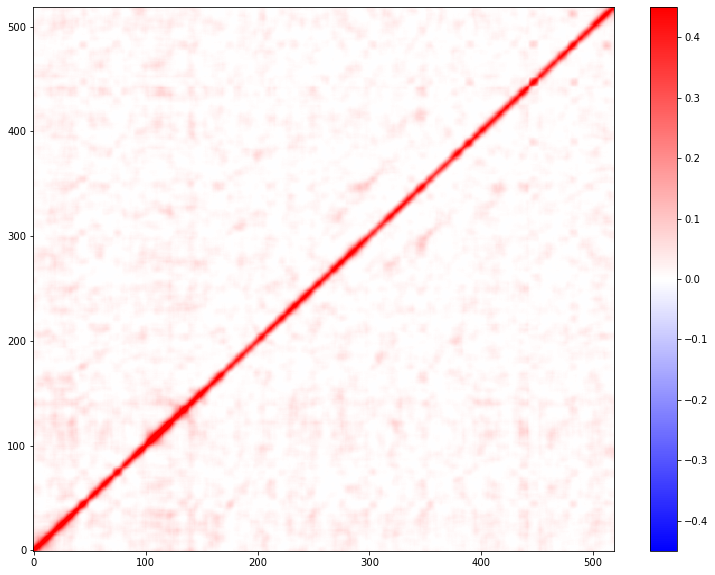

In [6]:
x = y = np.arange(0, len(df))
X, Y = np.meshgrid(x, y)

df = df.astype(float)
plt.figure(figsize=(13, 10))
colormesh = plt.pcolormesh(X, Y, df, shading='auto', cmap='bwr', vmin=-0.45, vmax=0.45)
plt.colorbar(colormesh, orientation="vertical")
plt.show()

In [9]:
csv = CaImageCSV(file_path)
preES_indexes = np.where(csv.data_frame.index.get_loc_level(key='A1preES', level=0, drop_level=False)[0])[0]
postES_indexes = np.where(csv.data_frame.index.get_loc_level(key='A1postES', level=0, drop_level=False)[0])[0]

A2_context_matrix = csv.data_frame.iloc[preES_indexes[0]:(postES_indexes[-1] + 1), :]
optimized_A2_context_matrix = csv.optimize_std(A2_context_matrix.astype(float))

engram_cells = optimized_A2_context_matrix.loc[:, csv.engram_cells()]
non_engram_cells = optimized_A2_context_matrix.loc[:, csv.non_engram_cells()]

engram_cells.dropna(how='all', axis=1, inplace=True)
non_engram_cells.dropna(how='all', axis=1, inplace=True)

engram_cells.fillna(0.0, inplace=True, axis=1)
non_engram_cells.fillna(0.0, inplace=True, axis=1)

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [10]:
engram_cell_correlation_per_time = []
non_engram_cell_correlation_per_time = []

for second in range(len(engram_cells) // 10):
    engram_sliding_window_data = engram_cells.iloc[second:second+10, :]
    non_engram_sliding_window_data = non_engram_cells.iloc[second:second+10, :]
    
    engram_cell_correlation_per_time.append(engram_sliding_window_data.corr())
    non_engram_cell_correlation_per_time.append(non_engram_sliding_window_data.corr())

In [11]:
engram_cell_correlation_per_time

[          C006      C017      C051      C065      C080      C092      C112  \
 C006  1.000000 -0.911112 -0.917562 -0.914587  0.953784 -0.908360 -0.915850   
 C017 -0.911112  1.000000  0.999858  0.999960 -0.850705  0.999976  0.999924   
 C051 -0.917562  0.999858  1.000000  0.999969 -0.856883  0.999716  0.999990   
 C065 -0.914587  0.999960  0.999969  1.000000 -0.854042  0.999872  0.999994   
 C080  0.953784 -0.850705 -0.856883 -0.854042  1.000000 -0.848048 -0.855251   
 C092 -0.908360  0.999976  0.999716  0.999872 -0.848048  1.000000  0.999814   
 C112 -0.915850  0.999924  0.999990  0.999994 -0.855251  0.999814  1.000000   
 C115 -0.429937  0.083478  0.097990  0.091241 -0.490449  0.077414  0.094096   
 C117  0.919489 -0.770617 -0.779489 -0.775376  0.910539 -0.766880 -0.777119   
 C134  0.640270 -0.695888 -0.696784 -0.696380  0.623037 -0.695482 -0.696554   
 C149  0.612509 -0.310161 -0.324638 -0.317888  0.616038 -0.304152 -0.320740   
 C152  0.725197 -0.757134 -0.758835 -0.758051  0.664

In [13]:
seconds = (len(engram_cells) // 10)
engram_df = pd.DataFrame(columns=list(range(seconds)), index=list(range(seconds)))
non_engram_df = pd.DataFrame(columns=list(range(seconds)), index=list(range(seconds)))
for i in range(seconds):
    i_engram_time_data = engram_cell_correlation_per_time[i]
    i_non_engram_time_data = non_engram_cell_correlation_per_time[i]
    for j in range(seconds):
        j_engram_time_data = engram_cell_correlation_per_time[j]
        j_non_engram_time_data = non_engram_cell_correlation_per_time[j]
        
        if engram_df.at[j, i] is not np.nan:
            engram_df.at[i, j] = engram_df.at[j, i]
        else:
            engram_cell_size = len(i_engram_time_data)
            product_value = i_engram_time_data * j_engram_time_data
            corr_sum = (product_value - (product_value * np.eye(len(product_value)))).sum().sum()
            engram_df.at[i, j] = corr_sum / (engram_cell_size * (engram_cell_size - 1))
            
            
        if non_engram_df.at[j, i] is not np.nan:
            non_engram_df.at[i, j] = non_engram_df.at[j, i]
        else:
            non_engram_cell_size = len(i_non_engram_time_data)
            product_value = i_non_engram_time_data * j_non_engram_time_data
            corr_sum = (product_value - (product_value * np.eye(len(product_value)))).sum().sum()
            non_engram_df.at[i, j] = corr_sum / (non_engram_cell_size * (non_engram_cell_size - 1))

In [14]:
(engram_df * np.eye(len(engram_df))).sum().mean()

0.4577232469308688

In [15]:
(non_engram_df * np.eye(len(non_engram_df))).sum().mean()

0.46128485010197884

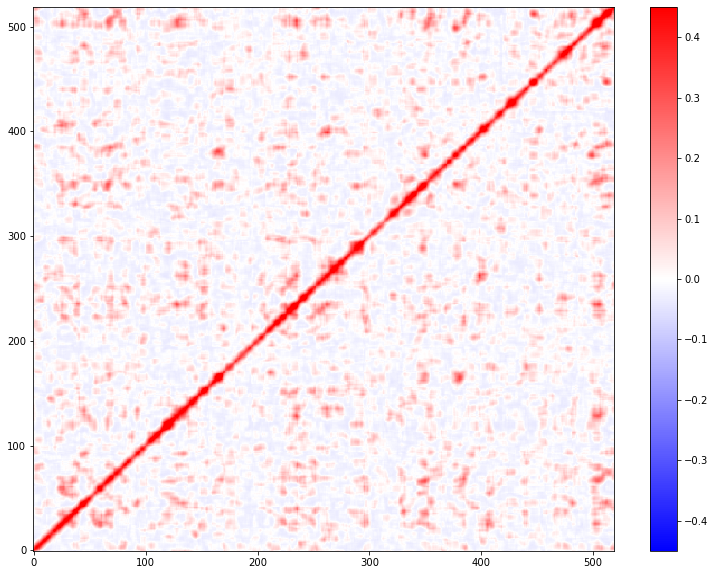

In [16]:
x = y = np.arange(0, len(engram_df))
X, Y = np.meshgrid(x, y)

engram_df = engram_df.astype(float)
plt.figure(figsize=(13, 10))
colormesh = plt.pcolormesh(X, Y, engram_df, shading='auto', cmap='bwr', vmin=-0.45, vmax=0.45)
plt.colorbar(colormesh, orientation="vertical")

In [17]:
x = y = np.arange(0, len(non_engram_df))
X, Y = np.meshgrid(x, y)

non_engram_df = non_engram_df.astype(float)
plt.figure(figsize=(13, 10))
colormesh = plt.pcolormesh(X, Y, non_engram_df, shading='auto', cmap='bwr', vmin=-0.45, vmax=0.45)
pp = plt.colorbar(colormesh, orientation="vertical")

In [64]:
def view_colormesh(df, aix, title=''):
    x = y = np.arange(0, len(df))
    X, Y = np.meshgrid(x, y)

    df = df.astype(float)
    aix.set_title(title)
    return aix.pcolormesh(X, Y, df, shading='auto', cmap='bwr', vmin=-0.45, vmax=0.45)

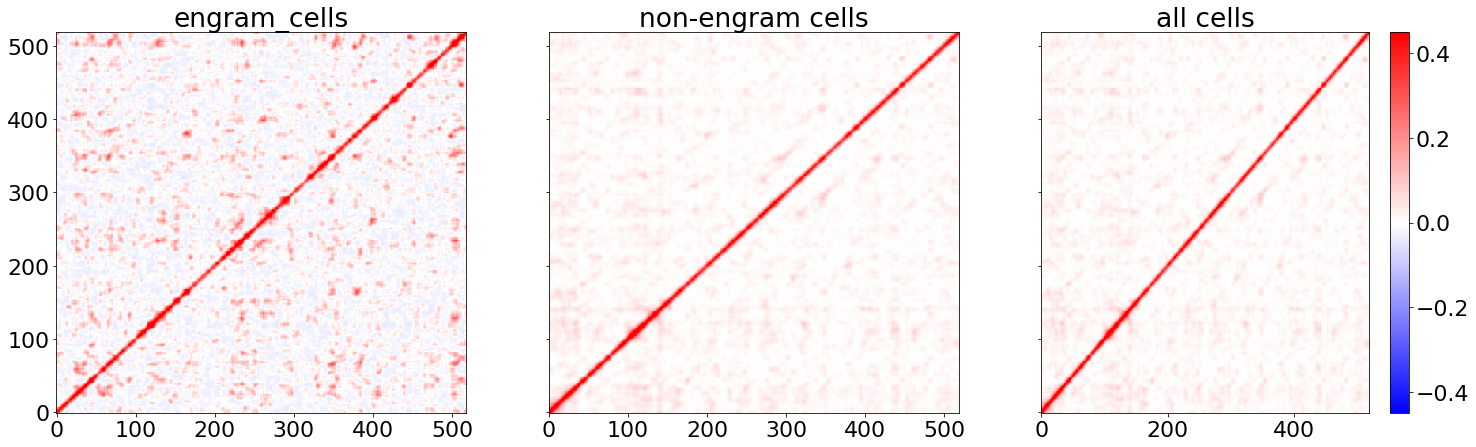

In [65]:
fig, aixs = plt.subplots(ncols=3, sharey=True, figsize=(25, 7))
view_colormesh(engram_df, aixs[0], title='engram cells')
view_colormesh(non_engram_df, aixs[1], title='non-engram cells')
all_color_mesh = view_colormesh(df, aixs[2], title='all cells')
plt.colorbar(all_color_mesh, orientation="vertical")
plt.show()

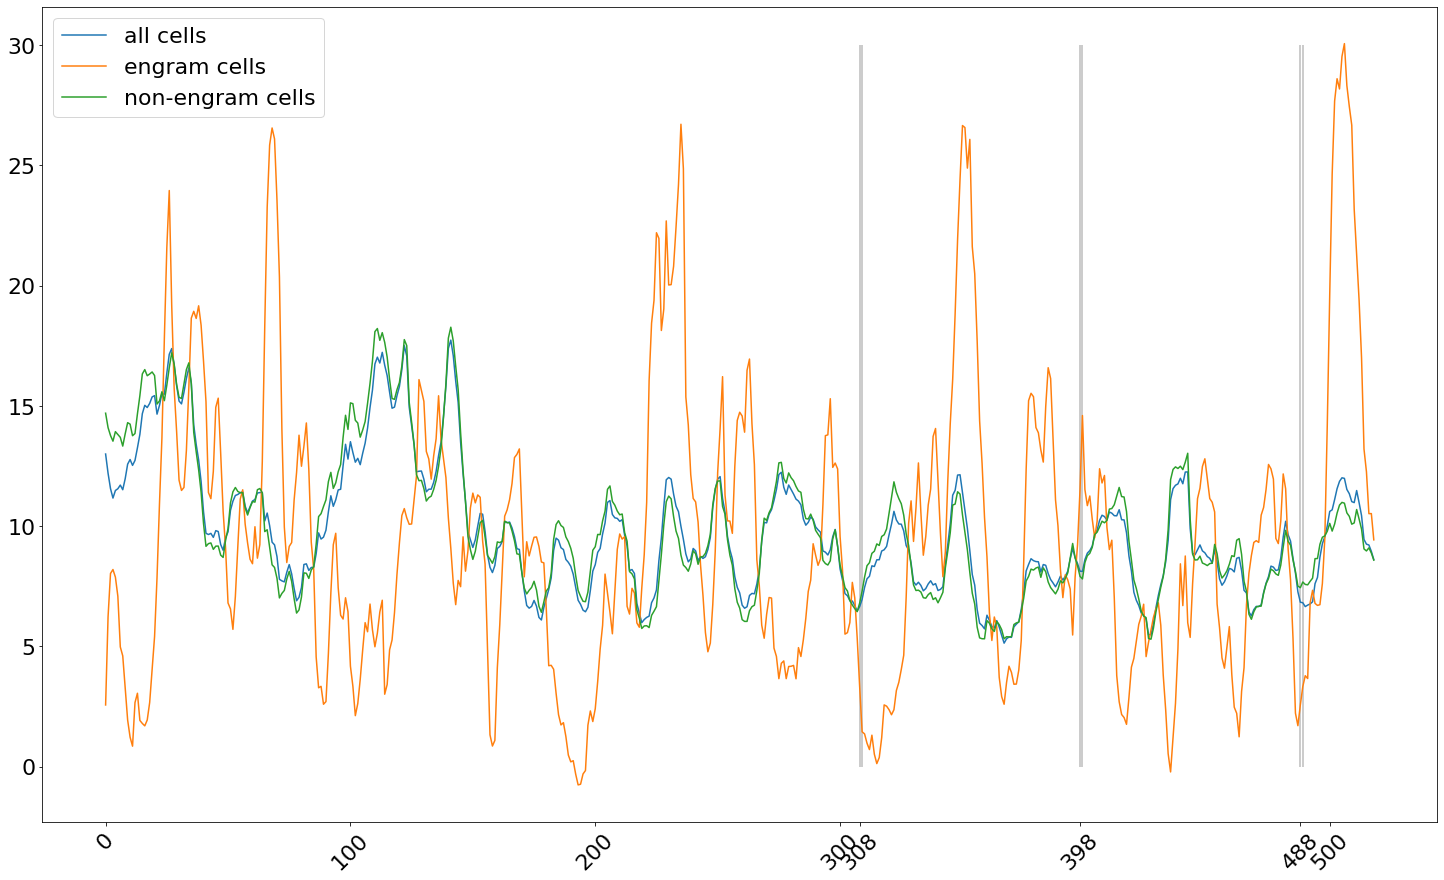

In [66]:
plt.figure(figsize=(25, 15))
plt.rcParams["font.size"] = 22
plt.plot(df.sum(), label='all cells')
plt.plot(engram_df.sum(), label='engram cells')
plt.plot(non_engram_df.sum(), label='non-engram cells')
plt.xticks([0, 100, 200, 300, 308, 398, 488, 500], rotation=45)
plt.bar([308, 309, 398, 399, 488, 489], ([30] * 6), color='0.8')
plt.legend()
plt.show()